# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

def load_data():
    training_file = "data/train.p"
    validation_file= "data/valid.p"
    testing_file = "data/test.p"

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
        
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

    assert(len(X_train) == len(y_train))
    assert(len(X_valid) == len(y_valid))
    assert(len(X_test) == len(y_test))
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Dataset Training contains 34799 samples
median=1.55%  mean=2.33%
Dataset Validation contains 4410 samples
median=1.36%  mean=2.33%


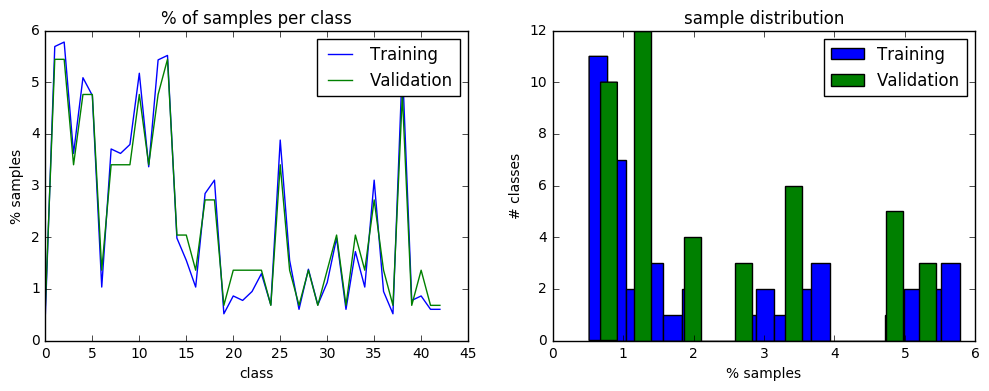

In [3]:
''' 
Data exploration visualization 
'''
import matplotlib.pyplot as plt
import random
import statistics
%matplotlib inline

def plot_dataset_distributions(datasets, set_descs):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4))
    ret_data_bins = []    
    for dataset, set_desc in zip(datasets, set_descs):
        # Create a histogram of the classes
        data_bins = np.bincount(dataset)
        # Convert to percent
        data_bins = data_bins / len(dataset) * 100
        ret_data_bins.append(data_bins)

        print("Dataset {} contains {} samples".format(set_desc, len(dataset)))
        print("median={:.2f}%  mean={:.2f}%".format(statistics.median(data_bins), statistics.mean(data_bins)))

        ax0.plot(range(len(data_bins)), data_bins, label=set_desc)
        ax0.set_title('% of samples per class')
        ax0.set_xlabel('class')
        ax0.set_ylabel('% samples')

        ax1.hist(data_bins, bins=20, label=set_desc)
        ax1.set_title('sample distribution')
        ax1.set_xlabel('% samples')
        ax1.set_ylabel('# classes')
    ax0.legend(loc=1)
    ax1.legend(loc=1)
    plt.show()
    return ret_data_bins

# Let's check if there's similar representation of image classes in the Training and Validation datasets
y_hist = plot_dataset_distributions(datasets=[y_train, y_valid], set_descs=["Training", "Validation"])
y_train_hist = y_hist[0]
y_valid_hist = y_hist[1]

In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.
A high ratio means that the class has a larger represnetation in the validation dataset.
Ratio: median=1.01  avg=1.11

Class  Validation Train  Ratio
-----  ---------- -----  -----
  0      0.68%    0.52%   1.32
  1      5.44%    5.69%   0.96
  2      5.44%    5.78%   0.94
  3      3.40%    3.62%   0.94
  4      4.76%    5.09%   0.94
  5      4.76%    4.74%   1.00
  6      1.36%    1.03%   1.32
  7      3.40%    3.71%   0.92
  8      3.40%    3.62%   0.94
  9      3.40%    3.79%   0.90
 10      4.76%    5.17%   0.92
 11      3.40%    3.36%   1.01
 12      4.76%    5.43%   0.88
 13      5.44%    5.52%   0.99
 14      2.04%    1.98%   1.03
 15      2.04%    1.55%   1.32
 16      1.36%    1.03%   1.32
 17      2.72%    2.84%   0.96
 18      2.72%    3.10%   0.88
 19      0.68%    0.52%   1.32
 20      1.36%    0.86%   1.58
 21 

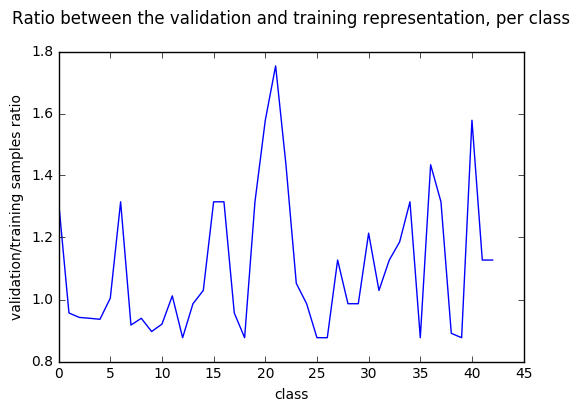

In [4]:
'''
Print the validation and training datasets per-class representation stats.
The 'ratio' column shows the ratio between the class's representation in the 
training set and its representation in the validation set.
'''
ratio = y_valid_hist/y_train_hist
print("In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.")
print("A high ratio means that the class has a larger represnetation in the validation dataset.")
print("Ratio: median={:.2f}  avg={:.2f}\n".format(statistics.median(ratio), statistics.mean(ratio)))
print("Class  Validation Train  Ratio")
print("-----  ---------- -----  -----")
for i in range(n_classes):
    print("{:3} {:9.2f}% {:7.2f}% {:6.2f}".format(i, y_valid_hist[i], y_train_hist[i], ratio[i]))

plt.plot(range(n_classes), y_valid_hist/y_train_hist)
plt.title('Ratio between the validation and training representation, per class\n')
plt.xlabel('class')
plt.ylabel('validation/training samples ratio')
plt.show()

In [5]:
"""
Helper plotting functions.
"""

def plot_image(image, nr, nc, i, label=""):
    """
    Plot a single image.
    If 'i' is greater than 0, then plot this image as 
    a subplot of a larger plot.
    """
    
    if i>0: 
        plt.subplot(nr, nc, i)
    else:
        plt.figure(figsize=(nr,nc))
        
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)
    plt.tight_layout()
    plt.imshow(image, cmap="gray")

    
import random
def plot_random(dataset1, dataset2=None, instances=1):
    """
    Plot a random image from one or two datasets.
    """
    nc = 1 if dataset2 is None else 2
    nr = instances
    #plt.figure(figsize=(nr,nc))
    for i in range(instances):
        index = random.randint(0, len(dataset1))
        plot_image(dataset1[index].squeeze(), nr, nc, 2*i+1)
        if dataset2 is not None:
            image = dataset2[index].squeeze()
            plot_image(image, nr, nc, 2*i+2)
            print("image mean=", image.mean())


from scipy import misc
def get_image_per_class(X, y):
    """ 
    Plot a representatative of each image class in a 5x10 image grid

    The training dataset is traversed until a sample of each class
    is encountered and cached.

    Another loop then travereses all of the cached images and displays them.
    The two loops are required because we want to display the image samples
    in class order, not in the order they are encountered.
    """
    signs_left = n_classes
    class_images = [None for x in range(signs_left)]

    i = 0
    while signs_left>0:
        if class_images[y[i]] == None:
            image = X[i].squeeze()
            class_images[y[i]] = image
            signs_left -= 1
        i += 1
    return class_images


def summarize_stats(class_images, y_train, y_valid):
    """
    'class_images' is a list of images, one per class.
    This function plots this images list, and print underneath each one its class, 
    the number of training samples, the percent of training samples, 
    and the percent of validation samples
    """
    # Create a histogram of the classes
    y_train_hist = np.bincount(y_train)
    y_valid_hist = np.bincount(y_valid)

    nr = 5; nc = 9
    plt.figure(figsize=(nr,nc))
    for image,i in zip(class_images, range(len(class_images))):
        label = (str(i) + "\n"                                            # class
              + str(y_train_hist[i]) + "\n"                               # no. of training samples
              + "{:.1f}%".format(100 * y_train_hist[i]/sum(y_train_hist))  + "\n"   # representation in training samples
              + "{:.1f}%".format(100 * y_valid_hist[i]/sum(y_valid_hist)))     # representation in validation samples
        plot_image(image, nr, nc, i+1, label)


/home/nzmora/anaconda3/envs/LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:58: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


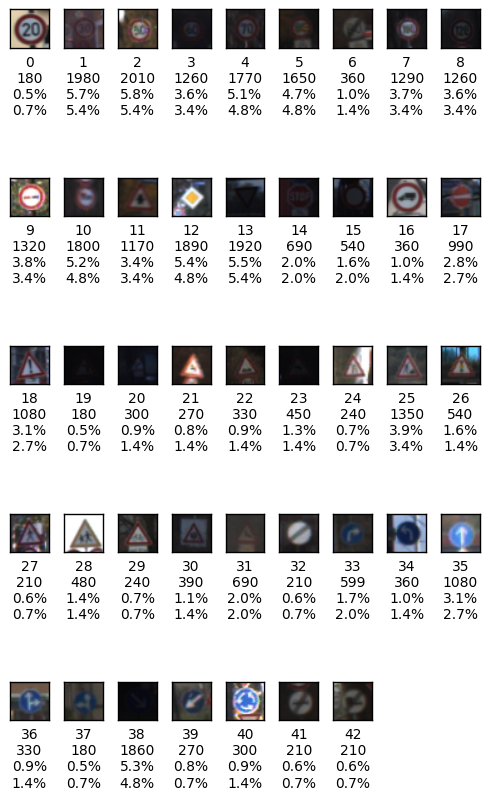

In [6]:
"""
Display a list of training images, one from each class
"""
class_images = get_image_per_class(X_train, y_train)
summarize_stats(class_images, y_train, y_valid)    

In [7]:
def get_num_instances(img_class, y):
    """
    Return the number of instances for 'img_class' in dataset 'y'
    """
    y_hist = np.bincount(y)
    n_instances = y_hist[img_class]
    return n_instances

def get_class_images(img_class, X, y):
    """
    Return a list containing all of the images of class 'img_class', 
    from dataset X
    """
    n_instances = get_num_instances(img_class, y)
    class_images = []
    i = 0
    while n_instances>0:
        if y[i] == img_class:
            image = X[i].squeeze()
            class_images.append(image)
            n_instances -= 1
        i += 1
    return class_images

import math
def plot_class_images(img_class, class_images, ncol, desc):
    """
    Plot all of the images in the list 'class_images'
    """
    nimages = len(class_images)
    nrow = math.ceil(nimages/ncol)
    #plt.figure(figsize=(nrow,ncol))
    print("class {} has {} images in the {} dataset".format(img_class,nimages, desc))
    for image,i in zip(class_images, range(nimages)):
        plot_image(image, nrow, ncol, i)
    
def plot_class(img_class, X, y, ncol, desc):
    """
    Plot the images in class 'img_class' from dataset X.
    """
    class_images = get_class_images(img_class, X, y)
    plot_class_images(img_class, class_images, ncol,  desc)


A plot of class 0 validation and training images
class 0 has 30 images in the validation dataset
class 0 has 180 images in the training dataset


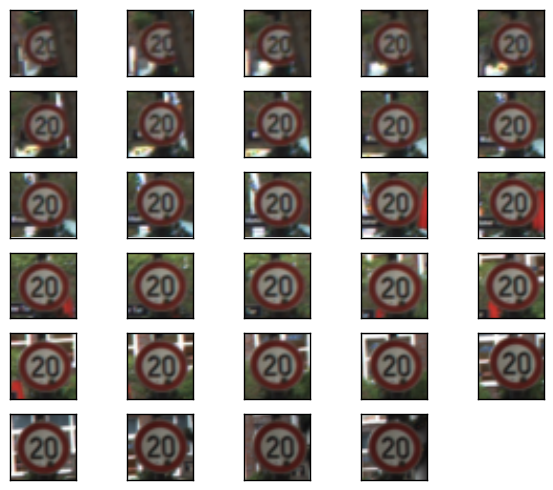

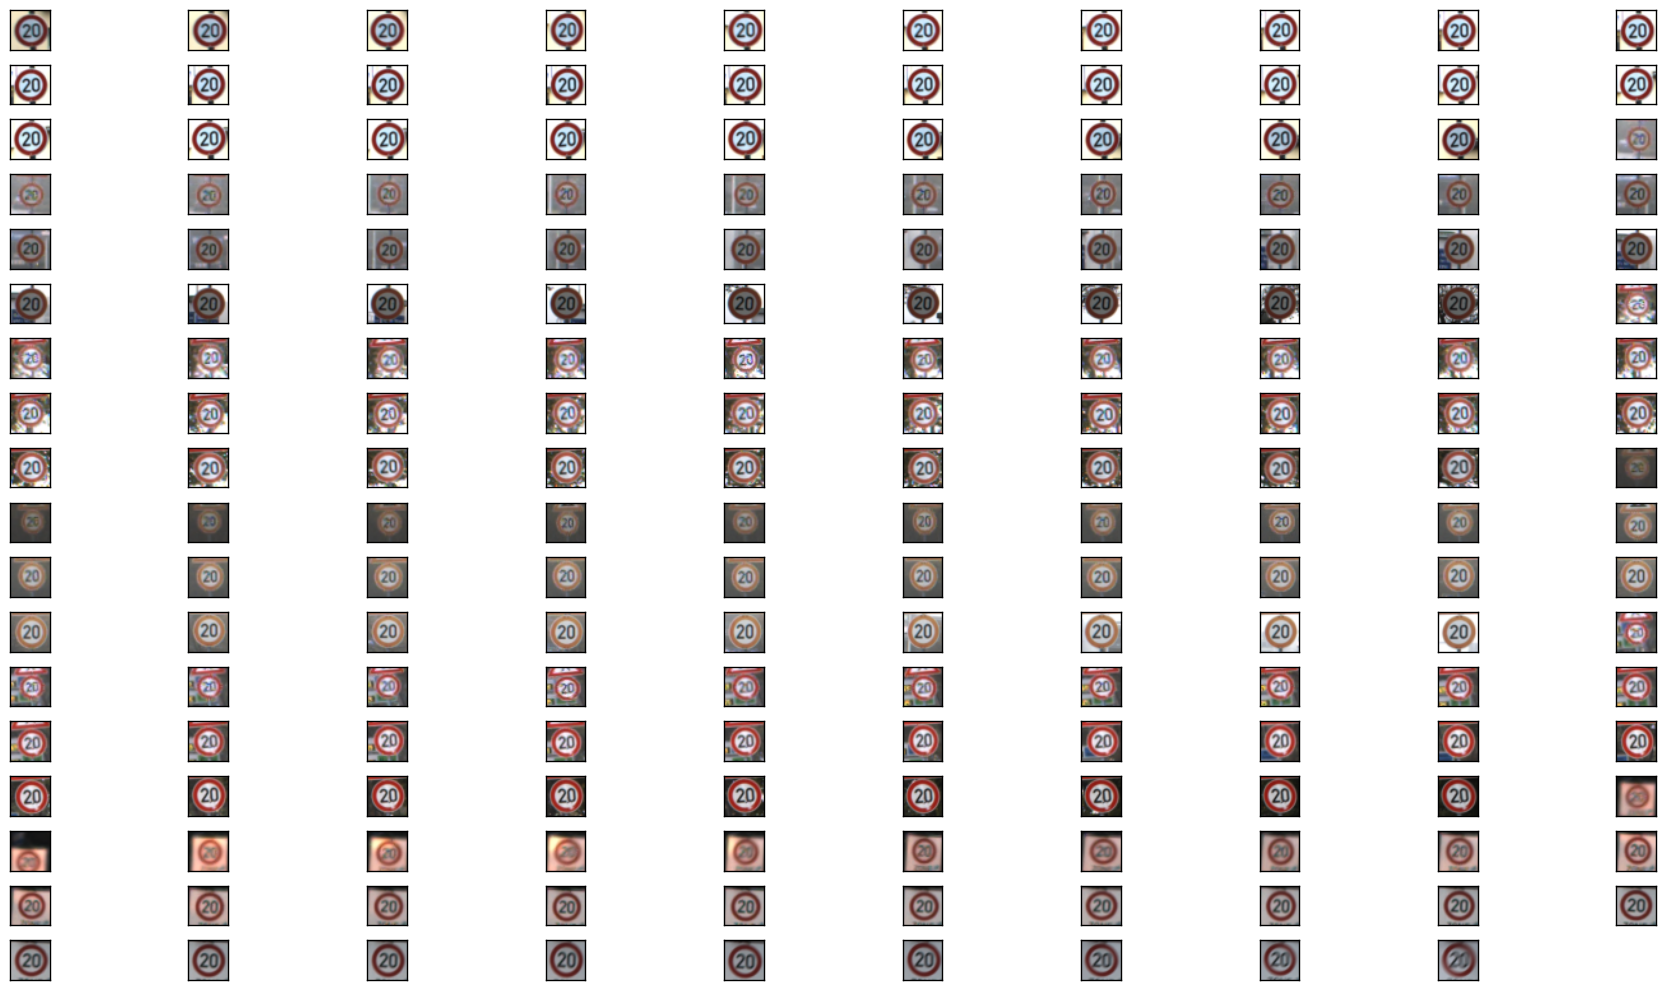

In [8]:
print("A plot of class 0 validation and training images")
plot_class(img_class = 0, X=X_valid, y=y_valid, ncol=5, desc="validation")
plot_class(img_class = 0, X=X_train, y=y_train, ncol=10, desc="training")


A plot of class 19 validation and training images
class 19 has 30 images in the validation dataset
class 19 has 180 images in the training dataset


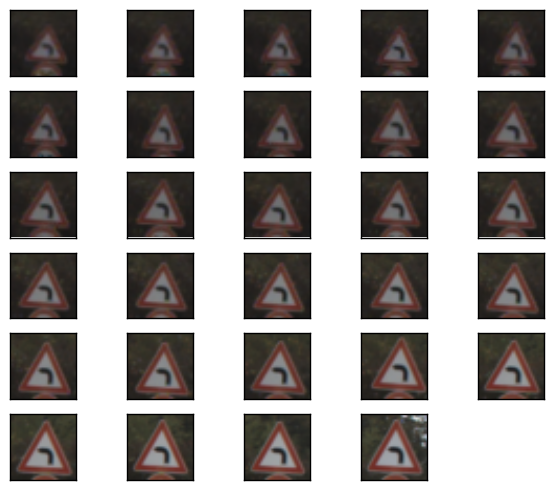

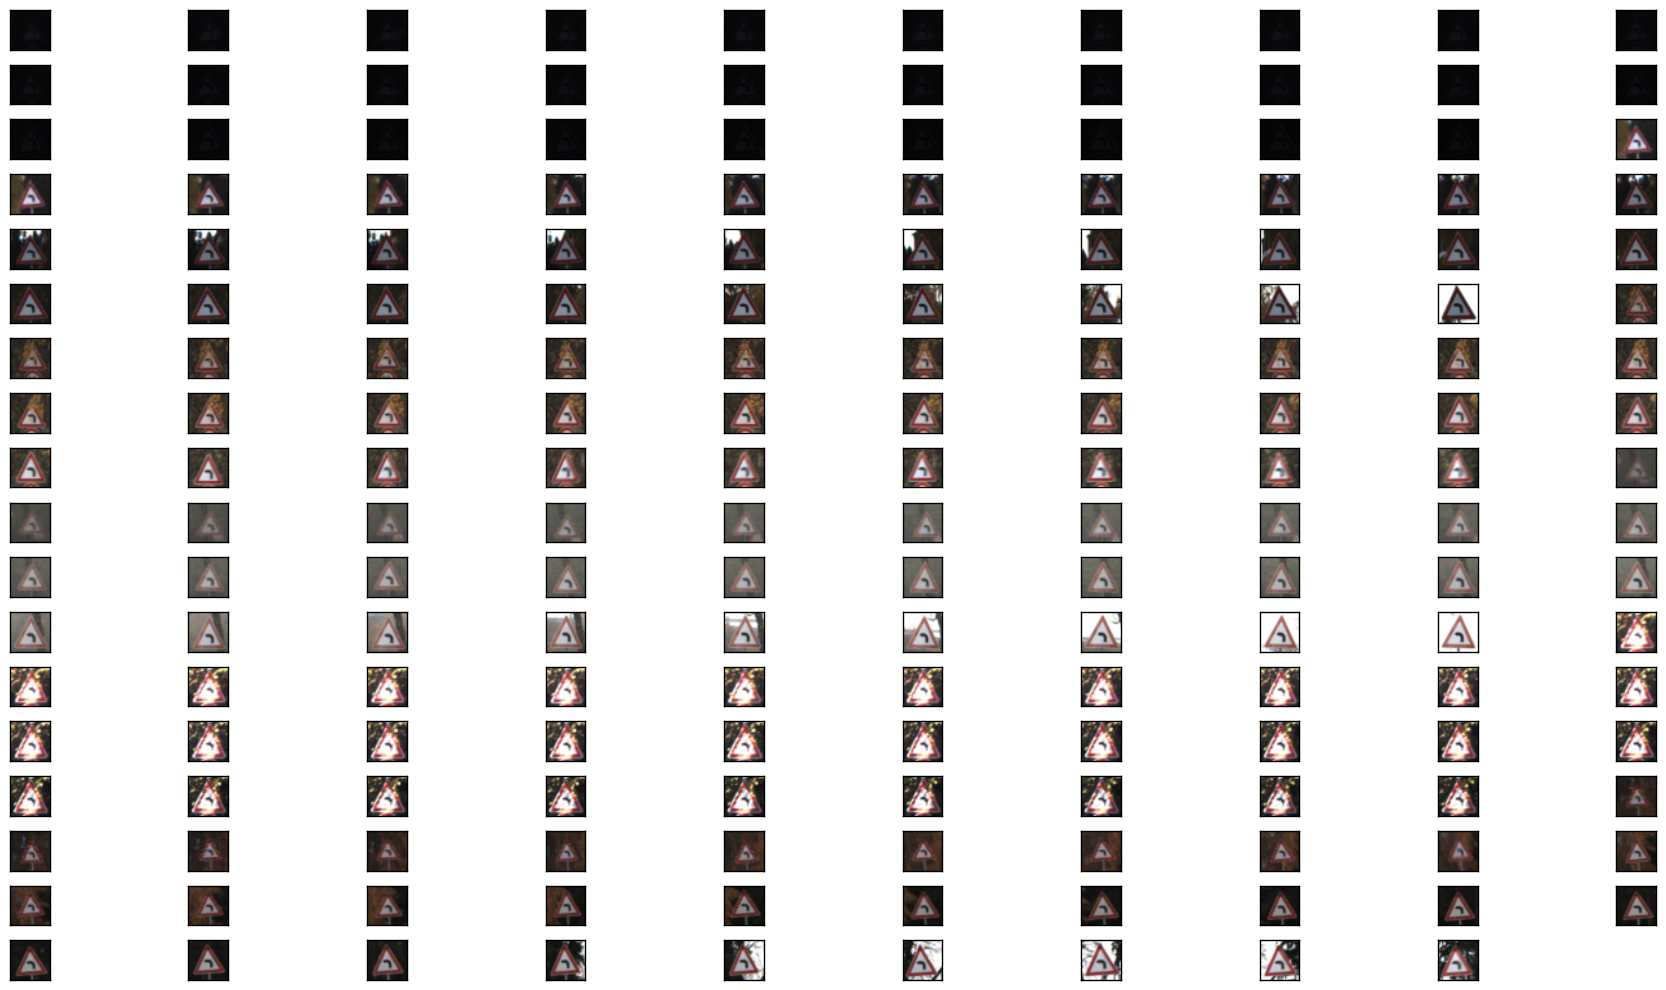

In [9]:
print("A plot of class 19 validation and training images")
plot_class(img_class = 19, X=X_valid, y=y_valid, ncol=5, desc="validation")
plot_class(img_class = 19, X=X_train, y=y_train, ncol=10, desc="training")


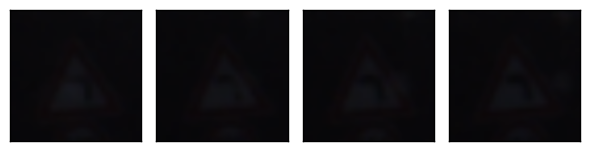

In [10]:
"""
Are these training images really that dark??
"""
class_images = get_class_images(19, X_train, y_train)
for i in range(4):
    plot_image(class_images[i], 1, 4, i+1)


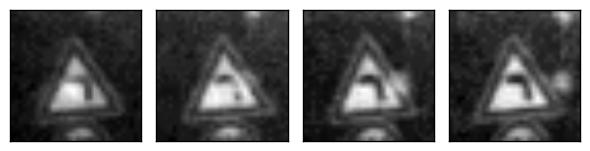

In [12]:
"""
I wonder if converting them to gray-scale will help?
"""
def rgb2gray2d(X):
    gray = np.dot(X, [0.299, 0.587, 0.114])
    gray = gray.reshape(len(X),32,32)
    return gray

dark_images = [class_images[i] for i in range(4)]
gray = rgb2gray2d(dark_images)
for i in range(4):
    plot_image(gray[i], 1, 4, i+1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
"""
Preprocessing utilities
"""

# Min-Max scaling for grayscale image data
# http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling
def normalize_scale(X):
    a = 0
    b = 1.0
    return a + X * (b-a) / 255

# http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html
def standardize(X):
    X -= np.mean(X) # zero-center
    X /= np.std(X) # normalize
    return (X)

n_channels = 3 # assume default netowrk input is RGB 

def rgb2gray(X):
    #gray = np.dot(X, [:,0.299, 0.587, 0.114])
    gray = np.dot(X, [0.299, 0.587, 0.114])
    gray = gray.reshape(len(X),32,32,1)
    global n_channels
    n_channels = 1
    return gray
    
# preprocessing pipeline
def preprocess_dataset(X):
    X = rgb2gray(X)
    X = normalize_scale(X)
    X = standardize(X)
    return X

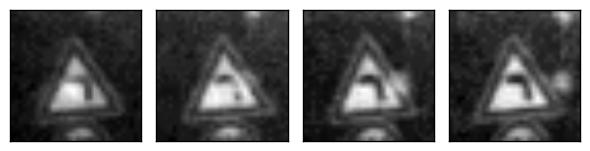

In [14]:
'''
Display some preprocessed images, as a sainty check
'''
preprocessed = preprocess_dataset(np.array(dark_images).astype(np.float32))
for i in range(4):
    plot_image(preprocessed[i].reshape(32,32), 1, 4, i+1)

In [15]:
'''
Augment a class by taking each image in the dataset and add augmented copies of it.
The augmentation is performed with scipy's ndimage library.
'''

from scipy import ndimage

def augment_class(class_images, class_to_augment, X, y, num):
    nimages = len(class_images)
    nrows = math.ceil(nimages/ncols)

    j = 0
    listX = []
    listy = []
    for _x,_y in zip(X, y):
        listX.append(_x)
        listy.append(_y)
    #ops = ['blur', 'rotate', 'shift', 'rotate-shift']
    ops = ['rotate', 'shift', 'rotate-shift']
    for image,i in zip(class_images, range(nimages)):
        orig_img = image
        for n in range(num):
            op = random.choice(ops)
            if op=='blur':
                image = ndimage.gaussian_filter(image, sigma=random.randint(1,5))
            elif op=='rotate':
                image = ndimage.rotate(orig_img, random.randint(-15, 15), reshape=False)
            elif op=='shift':
                shift_size = random.randint(-5, 5)
                image = ndimage.shift(image, (shift_size, shift_size, 0), order=0) #'bilinear'
            elif op=='rotate-shift':
                image = ndimage.rotate(orig_img, random.randint(-15, 15), reshape=False)
                shift_size = random.randint(-5, 5)
                image = ndimage.shift(image, (shift_size, shift_size, 0), order=0) #'bilinear'
            else:
                assert 0, 'unknown/unspecified augmentation operation'
            listX.append(image)
            listy.append(class_to_augment)
        
         #visaully sample the new images
        if i % 30 and i<900== 0:
            j += 1
            plot_image(image, 10, 3, j)
    
    return i, np.array(listX), np.array(listy)

In [16]:
ncols=10
classes_to_augment = [0,6,15,16,19,20,21,22,23,24,27,29,30,32,34,36,37,39,40,41,42]
for class_to_augment in classes_to_augment:
    class_images = get_class_images(class_to_augment, X=X_train, y=y_train)
    n_images, X_train, y_train = augment_class(class_images, class_to_augment, X=X_train, y=y_train, num=1)
    print("Done augmenting {} images to class {}".format(n_images, class_to_augment))

classes_to_augment = [0,19,24,27,29,32,37,41,42]
for class_to_augment in classes_to_augment:
    class_images = get_class_images(class_to_augment, X=X_train, y=y_train)
    n_images, X_train, y_train = augment_class(class_images, class_to_augment, X=X_train, y=y_train, num=2)
    print("Done augmenting {} images to class {}".format(n_images, class_to_augment))

print("New training set size", len(X_train))

Done augmenting 179 images to class 0
Done augmenting 359 images to class 6
Done augmenting 539 images to class 15
Done augmenting 359 images to class 16
Done augmenting 179 images to class 19
Done augmenting 299 images to class 20
Done augmenting 269 images to class 21
Done augmenting 329 images to class 22
Done augmenting 449 images to class 23
Done augmenting 239 images to class 24
Done augmenting 209 images to class 27
Done augmenting 239 images to class 29
Done augmenting 389 images to class 30
Done augmenting 209 images to class 32
Done augmenting 359 images to class 34
Done augmenting 329 images to class 36
Done augmenting 179 images to class 37
Done augmenting 269 images to class 39
Done augmenting 299 images to class 40
Done augmenting 209 images to class 41
Done augmenting 209 images to class 42
Done augmenting 359 images to class 0
Done augmenting 359 images to class 19
Done augmenting 479 images to class 24
Done augmenting 419 images to class 27
Done augmenting 479 images t

In [17]:
# Save the data for easy access
import os

def save_augmented_data(file, X, y):
    print('Saving data ({} samples) to {}'.format(len(X), file))
    try:
        with open(file, 'wb') as pfile:
            pickle.dump(
                {
                    'features': X,
                    'labels': y,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', file, ':', e)
        raise

    print('Data cached in pickle file.')

# Save the augmented data for later use
training_file = "data/augmented_train.p"
save_augmented_data(training_file, X_train, y_train)

Saving data (48359 samples) to data/augmented_train.p
Data cached in pickle file.


In [18]:
# Load the data that was previously augmented
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']
assert(len(X_train) == len(y_train))
print("loaded {} samples from {}".format(len(X_train), training_file))

loaded 48359 samples from data/augmented_train.p


Dataset Training contains 48359 samples
median=2.23%  mean=2.33%


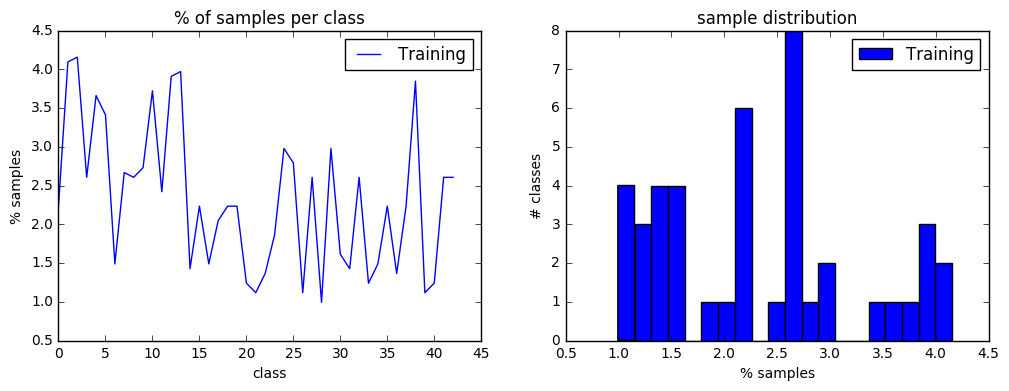

In [19]:
# Generate the training dataset distribution again to
# see how the samples distribute after the augmentation
#y_train_hist = plot_dataset_distributions(y_train, "Training")
y_hist = plot_dataset_distributions(datasets=[y_train], set_descs=["Training"])
y_train_hist = y_hist[0]

image mean= -0.829465186346
image mean= 0.144111897118
image mean= 1.60579778799
image mean= 0.263011652931
image mean= -0.840148869404


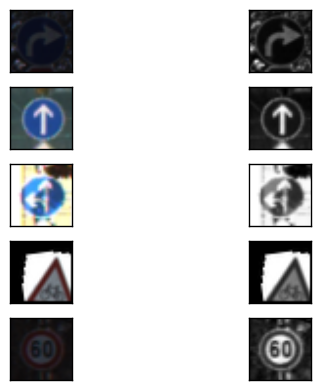

In [20]:
# I use different set of containers for the pre-processed datasets, in case I want to repreat this w/o rereading the data from disk.
XN_train = preprocess_dataset(X_train.astype(np.float32))
yN_train = y_train

XN_valid = preprocess_dataset(X_valid.astype(np.float32))
yN_valid = y_valid

XN_test = preprocess_dataset(X_test.astype(np.float32))
yN_test = y_test

# Let's plot a few random images to make sure the preprocessing worked well
plot_random(X_train, XN_train, 5)


### Model Architecture

In [21]:
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

def conv2d(x, nIFM, nOFM, k, s=1):
    W = tf.Variable(tf.truncated_normal([k, k, nIFM, nOFM], mu, sigma))
    #W = tf.get_variable("W", shape=[k, k, nIFM, nOFM],
    #       initializer=tf.contrib.layers.xavier_initializer())
    b = tf.Variable(tf.truncated_normal([nOFM]))
    conv = tf.nn.conv2d(x, W, strides=[1, s, s, 1], padding='VALID')
    # x = tf.nn.bias_add(x, b)
    return tf.nn.relu(conv + b)

def maxpool2d(x, k=2, s=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, s, s, 1], padding='VALID')

def fullyconnected(x, nIFM, nOFM, activation=False):
    W = tf.Variable(tf.truncated_normal([nIFM, nOFM], mu, sigma))
    #W = tf.get_variable("W", shape=[nIFM, nOFM],
    #       initializer=tf.contrib.layers.xavier_initializer())
    b = tf.Variable(tf.truncated_normal([nOFM]))
    fc = tf.matmul(x, W) + b
    if activation: return tf.nn.relu(fc)
    return fc



In [22]:
from tensorflow.contrib.layers import flatten

def new_size(w, k, s):
    return (w - k)/s + 1

def size_helper():
    C1 = new_size(32, 5, 1)
    P1 = new_size(C1, 2, 2)
    C2 = new_size(P1, 5, 1)
    P2 = new_size(C2, 2, 2)
    C3 = new_size(P2, 3, 1)
    P3 = new_size(C3, 2, 1)
    print("C1={}, P1={}, C2={}, P2={}, C3={}, P3={},".format(C1, P1, C2, P2, C3, P3))

def NetaNet1(x):    
    keep_prob = tf.constant(0.5)
    
    C1 = conv2d(x, nIFM=n_channels, nOFM=15, k=5, s=1)  # 32x32xn_channels => 28x28x15
    P1 = maxpool2d(C1, k=2, s=2)                        # 28x28x15 => 14x14x15
    C2 = conv2d(P1, nIFM=15, nOFM=25, k=5, s=1)         # 14x14x15 => 10x10x25
    P2 = maxpool2d(C2, k=2, s=2)                        # 10x10x25 => 5x5x25
    flatP2 = flatten(P2)
    FC1 = fullyconnected(flatP2, 5*5*25, 120, True)     # 625 => 120
    drop1 = tf.nn.dropout(FC1, keep_prob)
    FC2 = fullyconnected(drop1, 120, n_classes)         # 120 => 43
    return FC2

def NetaNet2(x):
    keep_prob = tf.constant(0.5)
    
    C1 = conv2d(x, nIFM=n_channels, nOFM=15, k=5, s=1)  # 32x32xn_channels => 28x28x15
    P1 = maxpool2d(C1, k=2, s=2)                        # 28x28x15 => 14x14x15
    C2 = conv2d(P1, nIFM=15, nOFM=25, k=5, s=1)         # 14x14x15 => 10x10x25
    P2 = maxpool2d(C2, k=2, s=2)                        # 10x10x25 => 5x5x25
    flatP2 = flatten(P2)
    FC1 = fullyconnected(flatP2, 5*5*25, 120, True)     # 625 => 120
    drop1 = tf.nn.dropout(FC1, keep_prob)
    FC2 = fullyconnected(FC1, 120, 84, True)            # 120 => 84
    drop2 = tf.nn.dropout(FC2, keep_prob)
    FC3 = fullyconnected(drop2, 84, n_classes)          # 84 => 43
    return FC3

def NetaNet3(x):    
    keep_prob = tf.constant(0.5)
    #with tf.variable_scope("C1", reuse=True):
    C1 = conv2d(x, nIFM=n_channels, nOFM=25, k=5, s=1)  # 32x32xn_channels => 28x28x15
    P1 = maxpool2d(C1, k=2, s=2)                        # 28x28x15 => 14x14x15
    #with tf.variable_scope("C2", reuse=True):
    C2 = conv2d(P1, nIFM=25, nOFM=40, k=5, s=1)         # 14x14x15 => 10x10x25
    P2 = maxpool2d(C2, k=2, s=2)                        # 10x10x25 => 5x5x25
    flatP2 = flatten(P2)
    #with tf.variable_scope("FC1", reuse=True):
    FC1 = fullyconnected(flatP2, 5*5*40, 120, True)     # 625 => 120
    drop1 = tf.nn.dropout(FC1, keep_prob)
    #with tf.variable_scope("FC2", reuse=True):
    FC2 = fullyconnected(drop1, 120, n_classes)         # 120 => 43
    return FC2

def NetaNet4(x):    
    keep_prob = tf.constant(0.5)
    C1 = conv2d(x, nIFM=n_channels, nOFM=25, k=5, s=1)  # 32x32xn_channels => 28x28x15
    P1 = maxpool2d(C1, k=2, s=2)                        # 28x28x15 => 14x14x15
    C2 = conv2d(P1, nIFM=25, nOFM=40, k=5, s=1)         # 14x14x15 => 10x10x25
    P2 = maxpool2d(C2, k=2, s=2)                        # 10x10x25 => 5x5x25
    C3 = conv2d(P2, nIFM=40, nOFM=60, k=3, s=1)         # 14x14x15 => 10x10x25
    flatP2 = flatten(C3)
    FC1 = fullyconnected(flatP2, 3*3*60, 120, True)     # 625 => 120
    drop1 = tf.nn.dropout(FC1, keep_prob)
    FC2 = fullyconnected(drop1, 120, n_classes)         # 120 => 43
    return FC2

size_helper()

C1=28.0, P1=14.0, C2=10.0, P2=5.0, C3=3.0, P3=2.0,


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [23]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf 



In [24]:
from sklearn.utils import shuffle
from tqdm import tqdm
import statistics
import pickle
import os

CALC_LOSS = True

class TrainingConfig():
    def __init__(self, batch_size, n_epochs, learn_rate):
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.learn_rate = learn_rate
    
class TrainingResults():
    def __init__(self, losses=[], batches=[], valid_acc=[], train_acc=[], class_errors=[], errors=[]):
        self.losses = losses
        self.batches = batches
        self.valid_acc = valid_acc
        self.train_acc = train_acc
        self.class_errors = class_errors
        self.errors = errors

class CnnTrainer():
    def __init__(self, config):
        self.config = config
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.config.learn_rate)
        self.training_operation = self.optimizer.minimize(self.loss_operation)
        self.correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
         
    def evaluate(self, X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, self.config.batch_size):
            batch_x, batch_y = X_data[offset:offset + self.config.batch_size], y_data[offset:offset + self.config.batch_size]
            accuracy = sess.run(self.accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    def train(self, XN_train, yN_train,XN_valid, yN_valid, trained_model_file):
        results = TrainingResults()
        saver = tf.train.Saver()
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(XN_train)
            cfg = self.config
            print("Training... rate=" + str(cfg.learn_rate) + " batch size=" + 
                  str(cfg.batch_size) + " epochs=" + str(cfg.n_epochs))
            print()

            for i in range(self.config.n_epochs):
                epoch_losses = []
                XN_train, yN_train = shuffle(XN_train, yN_train)
                for offset in range(0, num_examples, self.config.batch_size):
                    end = offset + self.config.batch_size
                    batch_x, batch_y = XN_train[offset:end], yN_train[offset:end]
                    _, l = sess.run([self.training_operation, self.loss_operation], 
                                    feed_dict={x: batch_x, y: batch_y})
                    epoch_losses.append(l)

                    if CALC_LOSS and offset % (self.config.batch_size-1) == 0:

                        # Once per epoch, calculate the validation accuracy
                        validation_accuracy = self.evaluate(XN_valid, yN_valid)
                        results.valid_acc.append(validation_accuracy)
                        training_accuracy = self.evaluate(XN_train, yN_train)
                        results.train_acc.append(training_accuracy)

                        results.losses.append(np.mean(np.array(epoch_losses)))
                        # Log batches
                        previous_batch = results.batches[-1] if results.batches else 0
                        results.batches.append(previous_batch + self.config.batch_size)


                print("EPOCH {} ...".format(i+1))
                validation_accuracy = self.evaluate(XN_valid, yN_valid)
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                training_accuracy = self.evaluate(XN_train, yN_train)
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Loss = {:.3f}".format(np.mean(np.array(epoch_losses))))
                print()

            if not os.path.exists(os.path.dirname(trained_model_file)):
                os.makedirs(os.path.dirname(trained_model_file))
            saver.save(sess, trained_model_file)
            print("Model saved")
            return results
        
# Need to understand which signs are predicted correctly
# First, lets get the predictions for all of the validation dataset
def get_predictions(X, saver):
    with tf.Session() as sess:
        saver.restore(sess, trained_model_file) # tf.train.latest_checkpoint('.'))
        predictions = sess.run(logits, feed_dict={x: X})
    return predictions

# Now lets see how the errors distribute
def get_errors(predictions, truth):
    errors = 0
    class_errors = [0 for x in range(n_classes)]
    for prediction,i in zip(predictions, range(len(predictions))):
        if truth[i] != np.argmax(prediction):
            errors += 1
            class_errors[truth[i]] += 1
    return class_errors, errors

In [25]:
def get_archive_info(net_name, batch_size, n_epochs, learn_rate):
    results_dir = "./results"
    archive_dir = results_dir + '/' + net_name + '_' + str(batch_size) + '_' + str(n_epochs) + '_' + str(learn_rate) + '_' + str(len(XN_train))
    archive_name = archive_dir + "/" + net_name + ".stats"
    trained_model_file =  archive_dir + '/' + net_name 
    
    return archive_dir, archive_name, trained_model_file

def archive_results(fname, results, config):
    with open(fname, 'wb') as fp:
        pickle.dump( {
                        'network': "neta",
                        'batch_size': config.batch_size,
                        'n_epochs': config.n_epochs,
                        'learn_rate': config.learn_rate,
                        'losses': results.losses,
                        'batches': results.batches,
                        'valid_acc': results.valid_acc,
                        'train_acc': results.train_acc,
                        'class_errors': results.class_errors,
                        'errors': results.errors
                    }, fp)
        
def load_archive(fname):
    try:
        with open (fname, 'rb') as fp:
            fields = pickle.load(fp)
            config = TrainingConfig(fields['batch_size'], fields['n_epochs'], fields['learn_rate'])
            results = TrainingResults(fields['losses'], fields['batches'], 
                                      fields['valid_acc'], fields['train_acc'],
                                      fields['class_errors'], fields['errors'])
            return config, results
    except FileNotFoundError:
        print("Error: could not open file", fname)
        return None
    
import matplotlib.pyplot as plt

def plot_train_results(results):
    loss_plot = plt.subplot(311)
    loss_plot.set_title('Loss')
    loss_plot.plot(results.batches, results.losses, 'g')
    loss_plot.set_xlim([results.batches[0], results.batches[-1]])
    loss_plot.set_ylim([results.losses[-1], results.losses[2]])     # Skip the first two losses

    loss_plot = plt.subplot(312)
    loss_plot.set_title('Loss (log)')
    loss_plot.semilogy(results.batches, results.losses, 'g')
    loss_plot.set_xlim([results.batches[2], results.batches[-1]]) # Skip the first two losses

    acc_plot = plt.subplot(313)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(results.batches, results.train_acc, 'b', label='Training Accuracy')
    acc_plot.plot(results.batches, results.valid_acc, 'r', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.1])
    acc_plot.set_xlim([results.batches[0], results.batches[-1]])
    acc_plot.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.tight_layout()
    plt.show()

In [26]:
batch_size=128; n_epochs=100; learn_rate=0.0005
net_name = "netanet4-no-blur"
archive_dir, archive_name, trained_model_file = get_archive_info(net_name, batch_size, n_epochs, learn_rate)

# Train
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
logits = NetaNet4(x)
one_hot_y = tf.one_hot(y, n_classes)
train_config = TrainingConfig(batch_size, n_epochs, learn_rate)
trainer = CnnTrainer(train_config)
train_results = trainer.train(XN_train, yN_train, XN_valid, yN_valid, trained_model_file)

# Predict (on validation dataset)
print("Collecting validation data...")
saver = tf.train.Saver()
predictions = get_predictions(XN_valid, saver)
train_results.class_errors, train_results.errors = get_errors(predictions, truth=yN_valid)

# Archive the training results 
print("Archiving results...", archive_name)
archive_results(archive_name, train_results, train_config)

print( "{} errors of {} samples ({:.2f}%)".format(train_results.errors, len(predictions), 100*train_results.errors/len(predictions)))

Training... rate=0.0005 batch size=128 epochs=100

EPOCH 1 ...
Validation Accuracy = 0.336
Training Accuracy = 0.343
Validation Loss = 3.454

EPOCH 2 ...
Validation Accuracy = 0.618
Training Accuracy = 0.626
Validation Loss = 1.732

EPOCH 3 ...
Validation Accuracy = 0.722
Training Accuracy = 0.752
Validation Loss = 1.037

EPOCH 4 ...
Validation Accuracy = 0.766
Training Accuracy = 0.808
Validation Loss = 0.729

EPOCH 5 ...
Validation Accuracy = 0.815
Training Accuracy = 0.848
Validation Loss = 0.566

EPOCH 6 ...
Validation Accuracy = 0.827
Training Accuracy = 0.872
Validation Loss = 0.459

EPOCH 7 ...
Validation Accuracy = 0.844
Training Accuracy = 0.891
Validation Loss = 0.394

EPOCH 8 ...
Validation Accuracy = 0.854
Training Accuracy = 0.905
Validation Loss = 0.337

EPOCH 9 ...
Validation Accuracy = 0.867
Training Accuracy = 0.912
Validation Loss = 0.294

EPOCH 10 ...
Validation Accuracy = 0.880
Training Accuracy = 0.923
Validation Loss = 0.267

EPOCH 11 ...
Validation Accuracy = 0.8

loading ./results/netanet4-no-blur_128_100_0.0005_48359/netanet4-no-blur.stats


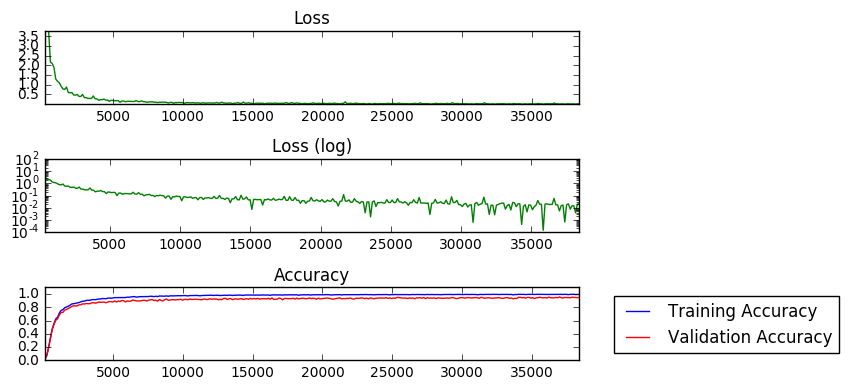

In [27]:
# Load training results from an archive
print("loading", archive_name)
config, results = load_archive(archive_name)
plot_train_results(results)

In [28]:
import tensorflow as tf

class 0: errors=7 of 30 samples (23.3%) 
class 1: errors=13 of 240 samples (5.4%) 
class 2: errors=9 of 240 samples (3.8%) 
class 3: errors=5 of 150 samples (3.3%) 
class 4: errors=0 of 210 samples (0.0%) 
class 5: errors=11 of 210 samples (5.2%) 
class 6: errors=0 of 60 samples (0.0%) 
class 7: errors=3 of 150 samples (2.0%) 
class 8: errors=28 of 150 samples (18.7%) 
class 9: errors=1 of 150 samples (0.7%) 
class 10: errors=0 of 210 samples (0.0%) 
class 11: errors=4 of 150 samples (2.7%) 
class 12: errors=4 of 210 samples (1.9%) 
class 13: errors=1 of 240 samples (0.4%) 
class 14: errors=3 of 90 samples (3.3%) 
class 15: errors=4 of 90 samples (4.4%) 
class 16: errors=2 of 60 samples (3.3%) 
class 17: errors=2 of 120 samples (1.7%) 
class 18: errors=3 of 120 samples (2.5%) 
class 19: errors=0 of 30 samples (0.0%) 
class 20: errors=12 of 60 samples (20.0%) 
class 21: errors=19 of 60 samples (31.7%) 
class 22: errors=7 of 60 samples (11.7%) 
class 23: errors=3 of 60 samples (5.0%) 
cl

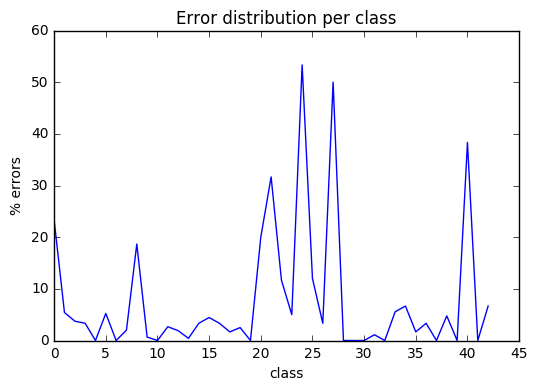

In [29]:
def print_class_errors(class_errors, y):
    y_bins = np.bincount(y)
    errors_percent = []
    for errors,i in zip(class_errors, range(len(class_errors))):
        errors_percent.append(100*errors/y_bins[i])
        print("class {}: errors={} of {} samples ({:.1f}%) ".format(i, errors, y_bins[i], errors_percent[i]))
    return errors_percent

errors_percent = print_class_errors(results.class_errors, yN_valid)
print("median error={:.2f}%  avg error={:.2f}%".format(statistics.median(errors_percent), statistics.mean(errors_percent)))

plt.plot(range(len(errors_percent)), errors_percent)
plt.title('Error distribution per class')
plt.xlabel('class')
plt.ylabel('% errors')
plt.show()


Class 24 deep dive into confusion distribution
class 24 has 16 errors
[0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 1 0 7]


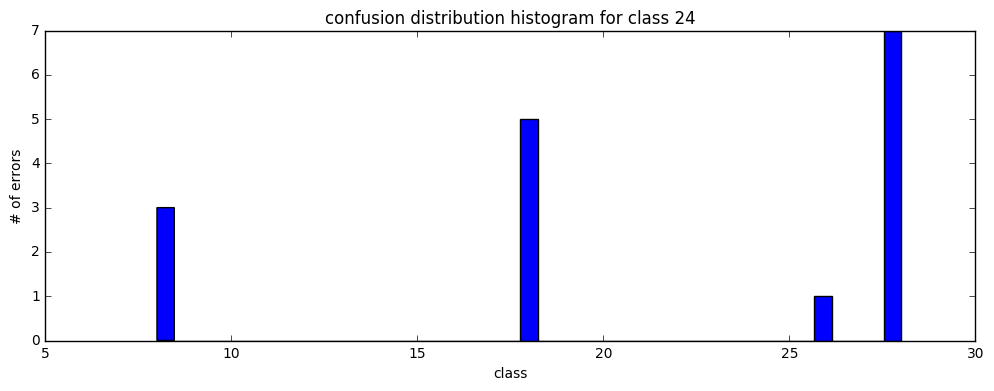

In [30]:
def get_errors_for_class(the_class, predictions, truth):
    errors = []
    for prediction,i in zip(predictions, range(len(predictions))):
        if (truth[i] == the_class) and (truth[i] != np.argmax(prediction)):
            errors.append(np.argmax(prediction))
    return errors


def print_class_errors2(errors):
    errors_hist = np.bincount(errors)
    print(errors_hist)


def plot_errors2(errors, the_class):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 4))
    ax1.hist(errors,bins=n_classes)
    ax1.set_title('confusion distribution histogram for class ' + str(the_class))
    ax1.set_xlabel('class')
    ax1.set_ylabel('# of errors')
    plt.show()
        
# Let's take a closer look at class 24
#predictions = get_predictions(XN_valid, saver)
the_class = 24
errors = get_errors_for_class(the_class, predictions, yN_valid)
print("Class {} deep dive into confusion distribution".format(the_class))
print("class {} has {} errors".format(the_class, len(errors)))

print_class_errors2(errors)
plot_errors2(errors, the_class)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

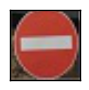

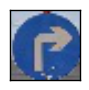

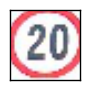

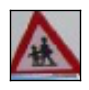

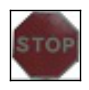

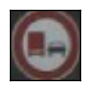

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

# http://electronicimaging.spiedigitallibrary.org/data/journals/electim/927109/jei_22_4_041105_f010.png

truth = []
image = mpimg.imread('external-data/no_entry.jpg')
#plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
plot_image(image, 1, 3, 0)
truth.append([17, image])

image = mpimg.imread('external-data/right_turn.jpg')
#print('This image is:', type(image), 'with dimesions:', image.shape)
plot_image(image, 1, 3, 0)
truth.append([33, image])

image = mpimg.imread('external-data/20kmph.jpg')
plot_image(image, 1, 3, 0)
truth.append([0, image])

image = mpimg.imread('external-data/children_crossing.jpg')
plot_image(image, 1, 3, 0)
truth.append([28, image])

image = mpimg.imread('external-data/stop.jpg')
plot_image(image, 1, 3, 0)
truth.append([14, image])

image = mpimg.imread('external-data/no_truck_passing.jpg')
plot_image(image, 1, 3, 0)
truth.append([10, image])
#print(truth[0][0])
#print(truth[1][0])
#print([col[0] for col in truth])

### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_truth = np.array([col[1] for col in truth])
y_truth = [col[0] for col in truth]

#X_truth2 =  [float(i) for i in X_truth]
X_pp_truth = preprocess_dataset((X_truth))

print(trained_model_file)
with tf.Session() as sess:
    saver.restore(sess, trained_model_file) 
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict={x: X_pp_truth})

errors = 0
for prediction,i in zip(predictions, range(len(predictions))):
    print("expected/predicted class: {}/{}".format(y_truth[i], np.argmax(prediction)))
    if np.argmax(prediction) != y_truth[i]:
        errors += 1
print("correct:", len(predictions) - errors)

./results/netanet4-no-blur_128_100_0.0005_48359/netanet4-no-blur
expected/predicted class: 17/17
expected/predicted class: 33/33
expected/predicted class: 0/38
expected/predicted class: 28/30
expected/predicted class: 14/14
expected/predicted class: 10/10
correct: 4


### Analyze Performance

In [38]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#
# http://programtalk.com/python-examples/tensorflow.nn.in_top_k/
#
def evaluation(logits, labels):
  """Evaluate the quality of the logits at predicting the label.
 
  Args:
    logits: Logits tensor, float - [batch_size, NUM_CLASSES].
    labels: Labels tensor, int32 - [batch_size], with values in the
      range [0, NUM_CLASSES).
 
  Returns:
    A scalar int32 tensor with the number of examples (out of batch_size)
    that were predicted correctly.
  """
  # For a classifier model, we can use the in_top_k Op.
  # It returns a bool tensor with shape [batch_size] that is true for
  # the examples where the label is in the top k (here k=1)
  # of all logits for that example.
  correct = tf.nn.in_top_k(logits, labels, 1)
  # Return the number of true entries.
  return tf.reduce_sum(tf.cast(correct, tf.int32))

correct = evaluation(predictions, y_truth).eval(session=tf.Session())
print("{} correct predictions of {} samples ({:.2f}%)".format(correct, len(predictions), 100*correct/len(predictions)))


4 correct predictions of 6 samples (66.67%)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, trained_model_file)
    probabilities = tf.nn.softmax(logits)
    predictions = sess.run(probabilities, feed_dict={x: X_pp_truth})
    what = sess.run(tf.nn.top_k(tf.constant(predictions), k=5)) 

print(what[0])
print(what[1])

[[  9.99999762e-01   2.46982694e-07   4.75746595e-11   7.99134457e-12
    7.08477114e-13]
 [  9.94519293e-01   5.45068504e-03   2.72393263e-05   2.77018808e-06
    8.50881143e-09]
 [  8.58211696e-01   1.41121686e-01   6.63056620e-04   2.79963319e-06
    7.79770517e-07]
 [  6.86778367e-01   3.10231149e-01   2.97433161e-03   5.31867227e-06
    2.67316204e-06]
 [  9.91004467e-01   7.96475168e-03   7.56928872e-04   2.20829927e-04
    3.76205244e-05]
 [  1.00000000e+00   9.29776419e-16   1.75685207e-35   0.00000000e+00
    0.00000000e+00]]
[[17 14 41  9 20]
 [33 42 10  7 13]
 [31 37 14 25 38]
 [11 30 34 42 23]
 [14 17 33  1 38]
 [10 42 41  0  1]]


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In [40]:
X_pp_test = preprocess_dataset(X_test)
predictions = get_predictions(X_pp_test, saver)
class_errors, errors = get_errors(predictions, y_test)

print( "Test dataset: {} errors of {} samples ({:.2f}%)".format(errors, len(predictions), 100*errors/len(predictions)))


Test dataset: 923 errors of 12630 samples (7.31%)


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 